## **InsuraPredict:Empowering Insurance with Predictive Intelligence**


Team 
Nasser Mohamed Amin
Badri Oumayma

---

**Importing Libraries**

In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier



## **Data Loading**
---

**Loading the insurance data**

In [83]:
Insurance_df=pd.read_csv("train_Insurance.csv")
Insurance_df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


**Display basic information about the dataset**

In [84]:
Insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


**Display statistical summary of the dataset**

In [85]:
Insurance_df.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


## **Data Preprocessing**
---

**Rename columns for better readability**

In [86]:
Insurance_df.rename(columns={'YearOfObservation':'Year_Of_Observation','Building Dimension':'Building_Dimension','NumberOfWindows':'Number_Of_Windows'},inplace=True)


**Drop the 'Customer Id' column as it is not relevant for analysis**

In [87]:
Insurance_df=Insurance_df.drop(columns=['Customer Id'])
Insurance_df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


**Check for duplicate rows**

In [88]:
df1=Insurance_df[Insurance_df.duplicated()]
df1.head()
df1.shape

(42, 12)

**Remove duplicates from the dataset**

In [89]:
Insurance_df.drop_duplicates(inplace=True,ignore_index=True)

**Check for missing values in each column**

In [90]:
Insurance_df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code               41
Claim                   0
dtype: int64

In [91]:
Insurance_df.shape

(4970, 12)

**Check the number of unique geographic codes**

In [92]:
Insurance_df["Geo_Code"].nunique()

1115

**Impute missing values in 'Geo_Code' with the most frequent value**

In [93]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(Insurance_df.loc[:,['Geo_Code']])
Insurance_df[['Geo_Code']]=arr

**Impute missing values in 'Garden' with the most frequent value**

In [94]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(Insurance_df.loc[:,['Garden']])
Insurance_df[['Garden']]=arr

In [95]:
Insurance_df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code                0
Claim                   0
dtype: int64

**Distribution of building dimensions**

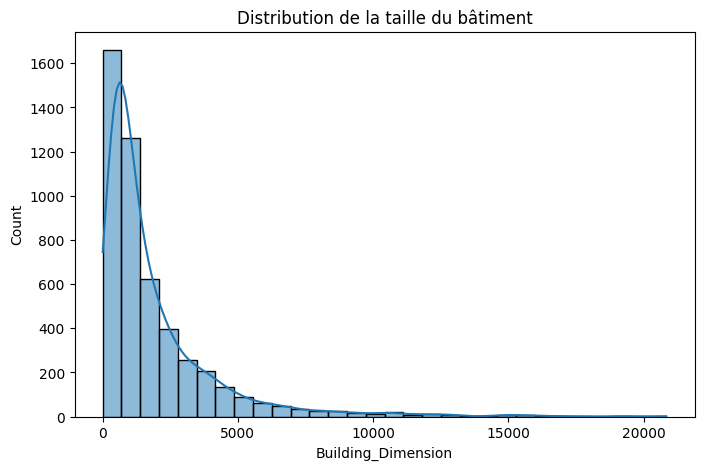

In [96]:

plt.figure(figsize=(8, 5))
sns.histplot(Insurance_df['Building_Dimension'], kde=True, bins=30)
plt.title("Distribution de la taille du bâtiment")
plt.show()

**Impute missing values in 'Building_Dimension' with the median**

In [97]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
arr=mf_imputer.fit_transform(Insurance_df.loc[:,['Building_Dimension']])
Insurance_df[['Building_Dimension']]=arr
Insurance_df.isnull().sum()

Year_Of_Observation    0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building_Dimension     0
Building_Type          0
Number_Of_Windows      0
Geo_Code               0
Claim                  0
dtype: int64

**Define categories for ordinal encoding of certain features**

In [98]:
ord_categories=[["N","V"],["N","V"],["O","V"],['U','R'],['Fire-resistive', 'Non-combustible', 'Ordinary', 'Wood-framed']]
enc1 = OrdinalEncoder(categories=ord_categories)
Insurance_df[["Building_Painted","Building_Fenced","Garden",'Settlement','Building_Type']]=enc1.fit_transform(Insurance_df.loc[:,["Building_Painted", "Building_Fenced","Garden",'Settlement','Building_Type']])
Insurance_df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,without,75117,non
1,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,62916,non
2,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,31149,oui
3,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,without,6012,oui
4,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,without,33063,oui
4966,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,13004,non
4967,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,94059,non
4968,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,74243,non


**Replace categorical values in 'Number_Of_Windows' and convert to integer**

In [99]:
Insurance_df["Number_Of_Windows"]=Insurance_df["Number_Of_Windows"].replace({'without':'0','>=10':'10'}).astype('int')
Insurance_df["Number_Of_Windows"].value_counts()

Number_Of_Windows
0     2440
4      665
3      598
5      436
2      245
6      225
7      141
8       84
10      52
1       49
9       35
Name: count, dtype: int64

**Encode the target variable 'Claim' into binary values**

In [100]:
Insurance_df['Claim'] = Insurance_df['Claim'].apply(lambda x: 1 if x == 'oui' else 0)

**Display boxplot to visualize potential outliers in the dataset**

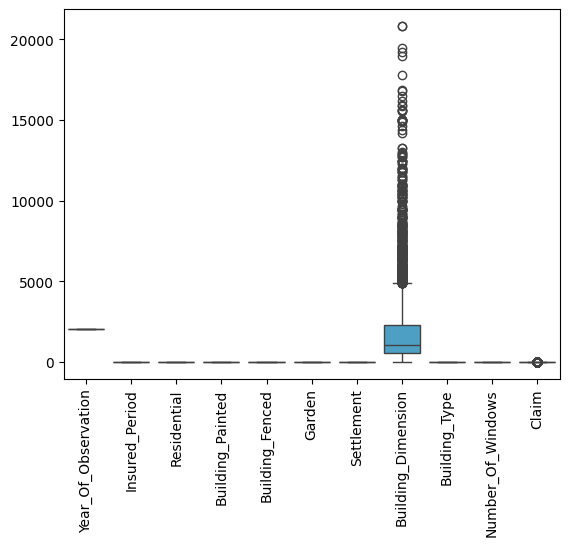

In [101]:
sns.boxplot(data=Insurance_df)
plt.xticks(rotation=90)
plt.show()

**reate a boxplot specifically for 'Building_Dimension'**

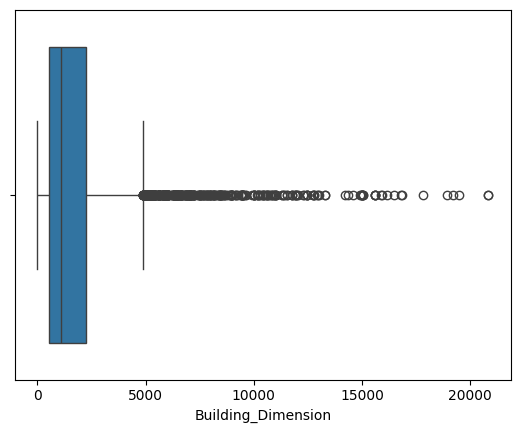

In [102]:
sns.boxplot(data=Insurance_df,x='Building_Dimension')
plt.show()

**Calculate IQR to identify outliers in 'Building_Dimension'**

In [103]:
Q1,Q3=np.percentile(Insurance_df["Building_Dimension"],[25,75])
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
Insurance_df['Building_Dimension']=np.where(Insurance_df['Building_Dimension']>=upper_limit,
upper_limit, np.where(Insurance_df['Building_Dimension']<=lower_limit,
lower_limit,Insurance_df['Building_Dimension']))

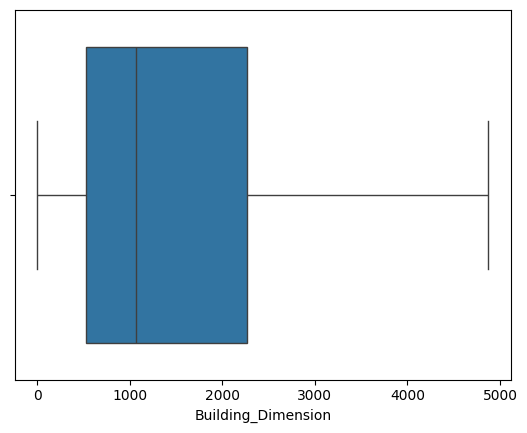

In [104]:
sns.boxplot(data=Insurance_df,x='Building_Dimension')
plt.show()

**Create subplots to visualize the distribution of categorical variables**

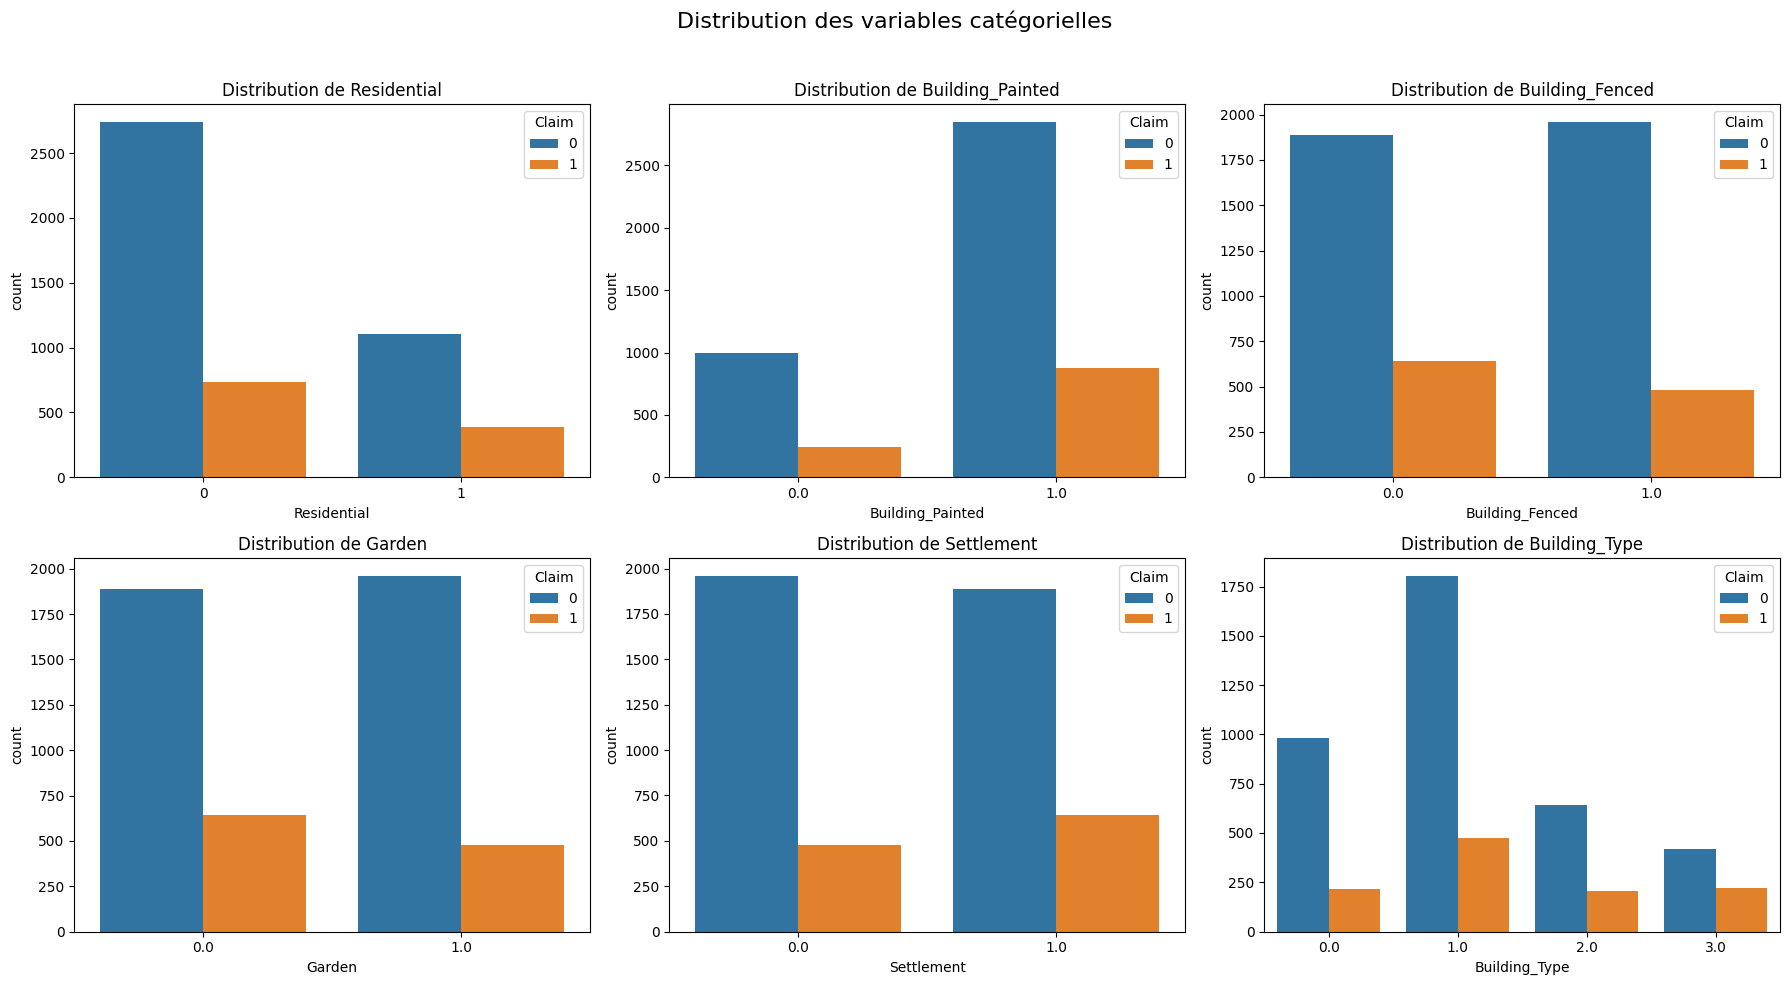

In [105]:
categorical_features = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']

# Créer une grille de sous-graphes avec 3 graphiques par ligne
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 lignes, 3 colonnes
fig.suptitle("Distribution des variables catégorielles", fontsize=16)

# Boucle pour chaque variable catégorielle
for i, feature in enumerate(categorical_features):
    row = i // 3  # Détermine la ligne
    col = i % 3   # Détermine la colonne
    sns.countplot(data=Insurance_df, x=feature, hue='Claim', ax=axes[row, col])
    axes[row, col].set_title(f"Distribution de {feature}")

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de l'espace pour le titre général
plt.show()

In [106]:
Insurance_df["Claim"].value_counts()

Claim
0    3849
1    1121
Name: count, dtype: int64

**Plot the distribution of the target variable 'Claim'**

C:\Users\oumai\AppData\Local\Temp\ipykernel_2952\2301155168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Insurance_df, x='Claim', palette='Set2')


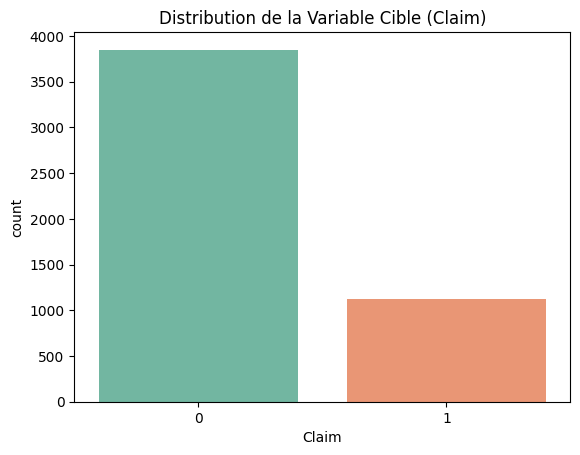

In [107]:
# Distribution de la variable cible
sns.countplot(data=Insurance_df, x='Claim', palette='Set2')
plt.title("Distribution de la Variable Cible (Claim)")
plt.show()


**Applying label encoding to 'Geo_Code'**

In [108]:
le = LabelEncoder()
# Appliquer l'encodage
Insurance_df['Geo_Code'] = le.fit_transform(Insurance_df['Geo_Code'])


**Visualize the correlation matrix**

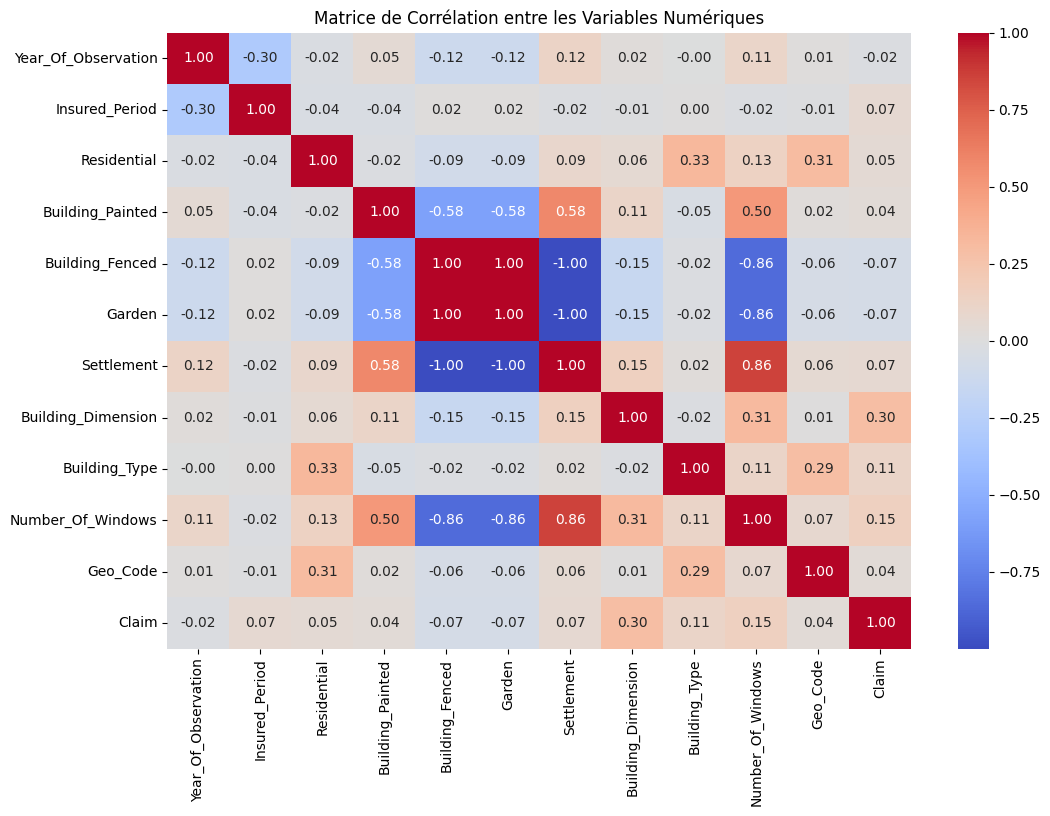

In [109]:
plt.figure(figsize=(12, 8))
sns.heatmap(Insurance_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation entre les Variables Numériques")
plt.show()

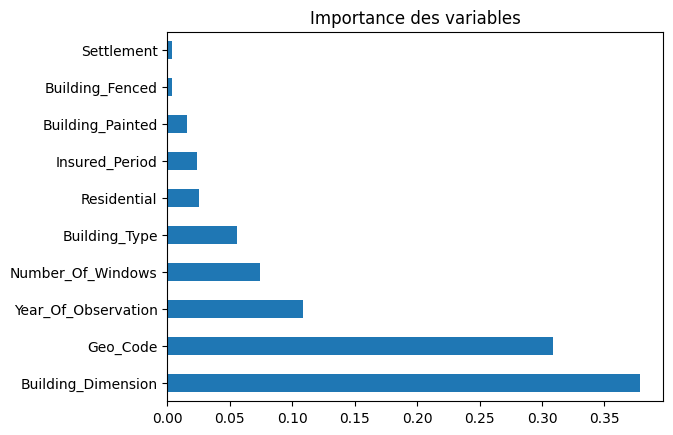

In [110]:
# Séparer les features et la target
X = Insurance_df.drop(['Claim'], axis=1)
Y= Insurance_df['Claim']

# Appliquer un modèle de forêt aléatoire pour obtenir l'importance des variables
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

# Importance des variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des variables")
plt.show()

## **Model Building**
---

**Handling class imbalance**





**Solution 1: Upsample the minority class to match the majority class size**

In [111]:
# Séparer les classes majoritaire et minoritaire
df_majority = Insurance_df[Insurance_df['Claim'] == 0]
df_minority = Insurance_df[Insurance_df['Claim'] == 1]

# Suréchantillonner la classe minoritaire
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Échantillonnage avec remise
                                 n_samples=len(df_majority),  # Égaliser le nombre avec la classe majoritaire
                                 random_state=42)  # Pour la reproductibilité

# Combiner les échantillons
Insurance_df2 = pd.concat([df_majority, df_minority_upsampled])

# Vérifier la distribution
print(Insurance_df['Claim'].value_counts())


Claim
0    3849
1    1121
Name: count, dtype: int64


Accuracy: 0.6675324675324675
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       782
           1       0.69      0.58      0.63       758

    accuracy                           0.67      1540
   macro avg       0.67      0.67      0.66      1540
weighted avg       0.67      0.67      0.67      1540



c:\Users\oumai\Desktop\Projet_ML\Assurance-Habitation-Pr-diction-Accidents\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


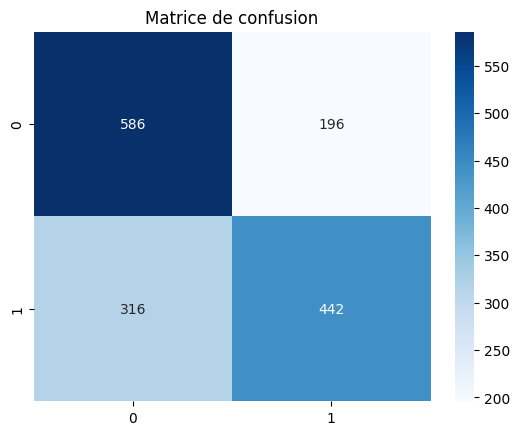

In [112]:
X = Insurance_df2.drop(['Claim'], axis=1)
Y= Insurance_df2['Claim']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Accuracy: 0.8941558441558441
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       782
           1       0.85      0.95      0.90       758

    accuracy                           0.89      1540
   macro avg       0.90      0.90      0.89      1540
weighted avg       0.90      0.89      0.89      1540



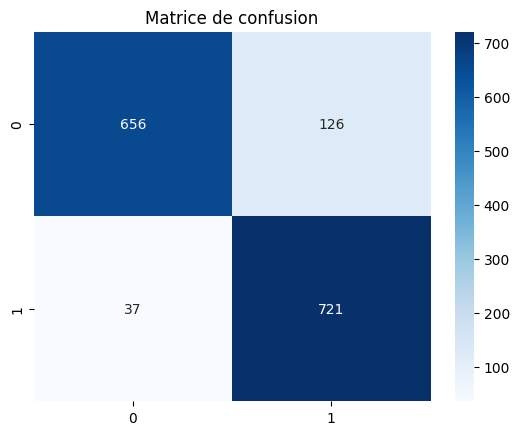

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

**Solution 2: Apply SMOTE to create synthetic samples for the minority class**

In [114]:
# Diviser les données en X (features) et y (target)
X2 = Insurance_df.drop('Claim', axis=1)
y2 = Insurance_df['Claim']

# Appliquer SMOTE pour générer de nouvelles instances synthétiques
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

Insurance_df3=pd.concat([X_resampled, y_resampled], axis=1)

# Vérifier la distribution après SMOTE
print(pd.Series(y_resampled).value_counts())
print(Insurance_df3.shape)

Claim
0    3849
1    3849
Name: count, dtype: int64
(7698, 12)


In [115]:
X3 = Insurance_df3.drop(['Claim'], axis=1)
Y3 = Insurance_df3['Claim']

Accuracy: 0.6435064935064935
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       780
           1       0.65      0.61      0.63       760

    accuracy                           0.64      1540
   macro avg       0.64      0.64      0.64      1540
weighted avg       0.64      0.64      0.64      1540



c:\Users\oumai\Desktop\Projet_ML\Assurance-Habitation-Pr-diction-Accidents\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


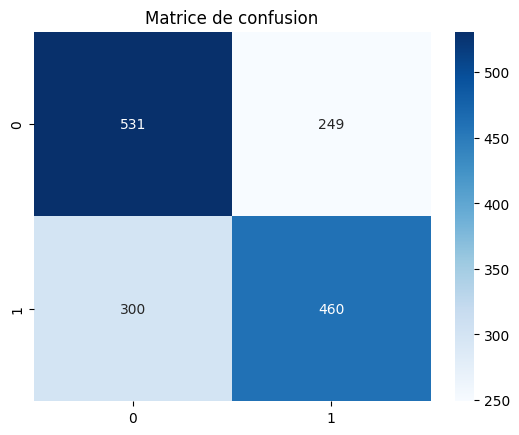

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Accuracy: 0.8311688311688312
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       780
           1       0.85      0.80      0.82       760

    accuracy                           0.83      1540
   macro avg       0.83      0.83      0.83      1540
weighted avg       0.83      0.83      0.83      1540



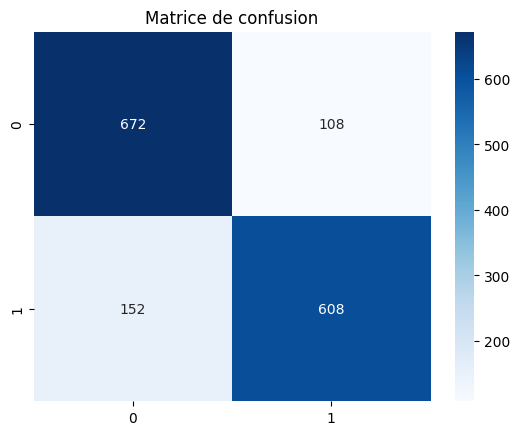

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [118]:
# Define the base models
base_models = [
    ('lr', LogisticRegression()),  # Logistic Regression
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest
    ('mlp', MLPClassifier(random_state=42, max_iter=300))  # Neural Network
]


In [119]:
# Modèle méta
meta_model = GradientBoostingClassifier(random_state=42)  # Modèle de niveau supérieur

In [120]:
# Construction du modèle de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

c:\Users\oumai\Desktop\Projet_ML\Assurance-Habitation-Pr-diction-Accidents\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oumai\Desktop\Projet_ML\Assurance-Habitation-Pr-diction-Accidents\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=300, random_state=42))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [121]:
y_pred = stacking_model.predict(X_test)
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 92.73%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       782
           1       0.93      0.92      0.93       758

    accuracy                           0.93      1540
   macro avg       0.93      0.93      0.93      1540
weighted avg       0.93      0.93      0.93      1540

